In [29]:
import numpy as np 
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myfunc
import warnings
warnings.filterwarnings(action='ignore')

def save_pickle(data_name, data):
    with open(data_name, 'wb') as f:
        pickle.dump(data, f)
        
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)        

rawdata = pd.read_csv("2016_housemasterdata.csv" , encoding = 'CP949')

main_variable = ["MD제공용_가구고유번호", "수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_만연령" , "가구원수","가구주_혼인상태코드" , "가구주_종사상지위코드", '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" ,"경상소득_이전소득(조사)[공적이전소득+사적이전소득]" , "지출(조사)[비소비지출(조사)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)" ,
                 "지출_소비지출", "지출_소비지출_식료품(외식비포함)" ,"지출_소비지출_주거비", "지출_소비지출_교육비(보육료포함)", "지출_소비지출_의료비", "지출_소비지출_교통비", "지출_소비지출_통신비", "지출_소비지출_경조비및기타소비지출(2016년까지)" ,
                 "지출_비소비지출(조사)" , "지출_비소비지출_세금(조사)" , "지출_비소비지출_공적연금사회보험료(조사)" , "지출_비소비지출_가구간이전지출(조사)" , "지출_비소비지출_비영리단체이전지출(조사)" , "지출_비소비지출_연간지급이자(조사)"]

main_variable_ko = ["id", "수도권여부" , "가구주_성별코드", "교육정도", "만연령","가구원수" ,"혼인상태" ,
                    "가구주종사직업","총소득", "근로소득" , "사업소득", "재산소득" , "이전소득" , "총지출" ,
                    "소비지출", "식료품", "주거비", "교육비", "의료비", "교통비", "통신비", 
                    "기타소비" , "비소비지출" ,"세금" , "공적연금사회보험료" , "가구간이전지출" , "비영리단체이전지출" , "연간지급이자"]

main_variable_en = ["id", "metro", "sex", "edu", "age", "family_number" , "marital status" , 
                    "housemaster_job" , "income", "income_lab", "income_bis", "income_property", "income_trans", "all_consump" ,
                    "consump", "consump_food", "consump_house", "consump_edu", "consump_medi", "consump_transp", "consump_comm", 
                    "consump_others" , "nonconsump" ,"nonconsump_tax" , "nonconsump_pension" , "nonconsump_transfer" , "nonconsump_organization" , "nonconsump_interest"]

main_variable_en_consump = ["all_consump" ,"consump", "consump_food", "consump_house", "consump_edu", "consump_medi", 
                            "consump_transp", "consump_comm", "consump_others"]

dict_var = myfunc.make_dict(main_variable_en, main_variable_ko)
dict_sex = {'1':'M', '2':'F'}
dict_edu = {'1':'안받음', '2':'초등', '3': '중등', '4': '고등', '5':'대학', '6':'대학교', '7':'대학원'}
dict_marry = {'1' : '미혼' , '2' : '배우자있음' , '3' : '사별' , '4': '이혼'}
dict_housejob = {'1' : '상용근로자', '2' : '임시.일용근로자', '3' : '고용원이 있는 자영업자', '4' : '고용원이 없는 자영업자', '5' : '무급가족종사자', '6' : '기타 종사자(실적급의 보험설계사, 대리 운전기사, 학습지 방문 교사 등)', '7' : '기타(무직자, 가사, 학생 등)'}

dict_familynumber = {}
for i in range(1, 10):
    dict_familynumber[str(i)] = f'{i}명' # 범주형으로 표현하기 위해

all_oridata = rawdata.loc[rawdata['조사부문코드'] == "P", [ '조사부문코드'] + main_variable] # 복지부문 , 금융부문에서 복지부분만 추출하기 위해 
all_oridata.drop(columns=['조사부문코드'], inplace=True)
all_oridata.columns = main_variable_en

final_data = myfunc.convert_int(all_oridata, main_variable_en_consump) # 데이터 int형식으로 바꾸기 
final_data = myfunc.convert_int_to_str(final_data, ['sex', 'edu' ,'marital status', 'housemaster_job' , 'family_number']) # 해당 범주는 str형식으로 바꾸기 

myfunc.change_contents(final_data, 'sex', dict_sex)
myfunc.change_contents(final_data, 'edu', dict_edu)
myfunc.change_contents(final_data, 'marital status', dict_marry)
myfunc.change_contents(final_data, 'housemaster_job', dict_housejob)
myfunc.change_contents(final_data, 'family_number', dict_familynumber)

# final_data['metro'] = final_data['metro'].str.replace('G','')

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151,G1,F,대학교,53,3명,배우자있음,상용근로자,12600,12600,...,200,430,310,1300,1896,981,725,0,0,190
3,10200161,G1,M,대학,46,5명,배우자있음,고용원이 있는 자영업자,4560,0,...,36,120,240,380,1589,86,636,0,0,867
4,10200171,G1,M,대학교,36,2명,배우자있음,상용근로자,12420,12420,...,35,700,120,800,2759,515,818,200,136,1090
5,10200191,G1,F,안받음,80,1명,사별,임시.일용근로자,612,160,...,92,10,36,40,9,1,0,0,8,0
6,10200211,G2,M,대학,57,4명,배우자있음,고용원이 없는 자영업자,10800,0,...,100,36,480,230,1137,161,756,0,150,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,991600301,G2,M,안받음,86,1명,사별,"기타(무직자, 가사, 학생 등)",240,0,...,50,30,30,40,1,1,0,0,0,0
18269,994200381,G2,F,안받음,84,1명,사별,"기타(무직자, 가사, 학생 등)",288,0,...,30,20,10,10,11,1,10,0,0,0
18270,994505311,G2,M,대학,41,5명,배우자있음,상용근로자,4540,4500,...,200,400,240,500,593,82,331,0,0,180
18271,994505321,G2,M,초등,54,4명,배우자있음,상용근로자,2160,2160,...,0,100,72,300,1,1,0,0,0,0


In [30]:
from rdt import HyperTransformer
from rdt.transformers.numerical import GaussianNormalizer
from rdt.transformers.categorical import LabelEncoder
from rdt.transformers.numerical import FloatFormatter
from rdt.transformers.categorical import FrequencyEncoder

In [44]:
cond1 = [final_data['income_lab'] == 0 , final_data['income_lab'] > 0]
cond2 = [final_data['consump_food'] == 0 , final_data['consump_food'] > 0] 
cond3 = [final_data['nonconsump_tax'] == 0 , final_data['nonconsump_tax'] > 0]

less_data_list = []

for k in range(len(cond1)):
    for j in range(len(cond2)):
        for i in range(len(cond3)):
            aa = final_data[cond1[k] & cond2[j] & cond3[i]]
            less_data_list.append(aa)


In [45]:
ht = HyperTransformer()

In [46]:
ht.detect_initial_config(data=final_data)

In [47]:
ht.get_config()

{
    "sdtypes": {
        "id": "numerical",
        "metro": "categorical",
        "sex": "categorical",
        "edu": "categorical",
        "age": "numerical",
        "family_number": "categorical",
        "marital status": "categorical",
        "housemaster_job": "categorical",
        "income": "numerical",
        "income_lab": "numerical",
        "income_bis": "numerical",
        "income_property": "numerical",
        "income_trans": "numerical",
        "all_consump": "numerical",
        "consump": "numerical",
        "consump_food": "numerical",
        "consump_house": "numerical",
        "consump_edu": "numerical",
        "consump_medi": "numerical",
        "consump_transp": "numerical",
        "consump_comm": "numerical",
        "consump_others": "numerical",
        "nonconsump": "numerical",
        "nonconsump_tax": "numerical",
        "nonconsump_pension": "numerical",
        "nonconsump_transfer": "numerical",
        "nonconsump_organization": "numer

In [48]:
ht.set_config(config = {
    "sdtypes": {
        "id": "numerical",
        "metro": "categorical",
        "sex": "categorical",
        "edu": "categorical",
        "age": "numerical",
        "family_number": "categorical",
        "marital status": "categorical",
        "housemaster_job": "categorical",
        "income": "numerical",
        "income_lab": "numerical",
        "income_bis": "numerical",
        "income_property": "numerical",
        "income_trans": "numerical",
        "all_consump": "numerical",
        "consump": "numerical",
        "consump_food": "numerical",
        "consump_house": "numerical",
        "consump_edu": "numerical",
        "consump_medi": "numerical",
        "consump_transp": "numerical",
        "consump_comm": "numerical",
        "consump_others": "numerical",
        "nonconsump": "numerical",
        "nonconsump_tax": "numerical",
        "nonconsump_pension": "numerical",
        "nonconsump_transfer": "numerical",
        "nonconsump_organization": "numerical",
        "nonconsump_interest": "numerical"
    },
    "transformers": {
        "id": FloatFormatter(),
        "metro": FrequencyEncoder(),
        "sex": FrequencyEncoder(),
        "edu": FrequencyEncoder(),
        "age": FloatFormatter(),
        "family_number": FrequencyEncoder(),
        "marital status": FrequencyEncoder(),
        "housemaster_job": FrequencyEncoder(),
        "income": GaussianNormalizer(),
        "income_lab": GaussianNormalizer(distribution = 'gamma'),
        "income_bis": GaussianNormalizer(),
        "income_property": GaussianNormalizer(),
        "income_trans": GaussianNormalizer(),
        "all_consump": GaussianNormalizer(),
        "consump": GaussianNormalizer(),
        "consump_food": GaussianNormalizer(distribution = 'gamma'),
        "consump_house": GaussianNormalizer(),
        "consump_edu": GaussianNormalizer(),
        "consump_medi": GaussianNormalizer(),
        "consump_transp": GaussianNormalizer(),
        "consump_comm": GaussianNormalizer(),
        "consump_others": GaussianNormalizer(),
        "nonconsump": GaussianNormalizer(),
        "nonconsump_tax": GaussianNormalizer(distribution = 'gamma'),
        "nonconsump_pension": GaussianNormalizer(),
        "nonconsump_transfer": GaussianNormalizer(),
        "nonconsump_organization": GaussianNormalizer(),
        "nonconsump_interest": GaussianNormalizer()
    }
})

In [50]:
less_list_df = []
for i in range(0,8):
    less_list_df.append("")

In [51]:
for i in range(0,8):
    ht.fit(less_data_list[i])
    less_list_df[i] = ht.fit_transform(less_data_list[i])

In [14]:
less_transformed_data_names = ["gamma_transformed_data" + str(i) + ".csv" for i in range(0,8)] 

for i in range(0,8):
    less_list_df[i].to_csv(less_transformed_data_names[i] , index = False)

#################################

In [7]:
more_transformed_data = []

for i in range(0, 8):
    file_name = "gamma_transformed_data" + str(i) + ".csv"
    df = pd.read_csv(file_name)
    more_transformed_data.append(df)

In [8]:
from sdv.tabular import CTGAN

In [9]:
more_syn_list = []
for i in range(0,8):
    more_syn_list.append("")

In [10]:
model1 = CTGAN(epochs = 600 , batch_size = 10 , verbose = True) # 10 ~ 100개
model2 = CTGAN(epochs = 600 , batch_size = 100 , verbose = True) # 100 ~ 1000개 
model3 = CTGAN(epochs = 600 , batch_size = 300 , verbose = True) # 1000 ~ 3000개 
model4 = CTGAN(epochs = 600 , batch_size = 500 , verbose = True) # 3000개 이상 

In [11]:
for i in range(0,8):
    if len(more_transformed_data[i]) < 10  :
        more_syn_list[i] = more_transformed_data[i]
        
    elif 10 <= len(more_transformed_data[i]) <= 100 :   
        model1.fit(more_transformed_data[i])
        more_syn_list[i] = model1.sample(len(more_transformed_data[i]))
        
    elif 100 <= len(more_transformed_data[i]) <= 1000 : 
        model2.fit(more_transformed_data[i])
        more_syn_list[i] = model2.sample(len(more_transformed_data[i]))
        
    elif 1000 <= len(more_transformed_data[i]) < 3000 : 
        model3.fit(more_transformed_data[i])
        more_syn_list[i] = model3.sample(len(more_transformed_data[i]))                
        
    else : 
        model4.fit(more_transformed_data[i])
        more_syn_list[i] = model4.sample(len(more_transformed_data[i])) 

Epoch 1, Loss G:  0.0270,Loss D:  0.0163
Epoch 2, Loss G:  0.0326,Loss D: -0.0984
Epoch 3, Loss G:  0.0323,Loss D: -0.1618
Epoch 4, Loss G:  0.0861,Loss D: -0.1415
Epoch 5, Loss G:  0.0798,Loss D: -0.1900
Epoch 6, Loss G:  0.0422,Loss D: -0.3175
Epoch 7, Loss G:  0.0922,Loss D: -0.3871
Epoch 8, Loss G: -0.0130,Loss D: -0.2579
Epoch 9, Loss G:  0.0133,Loss D: -0.4212
Epoch 10, Loss G: -0.0954,Loss D: -0.4343
Epoch 11, Loss G: -0.0957,Loss D: -0.4810
Epoch 12, Loss G: -0.0757,Loss D: -0.6873
Epoch 13, Loss G: -0.2265,Loss D: -0.7006
Epoch 14, Loss G: -0.1785,Loss D: -0.5608
Epoch 15, Loss G: -0.3868,Loss D: -0.5914
Epoch 16, Loss G: -0.1683,Loss D: -0.9060
Epoch 17, Loss G: -0.4126,Loss D: -0.6414
Epoch 18, Loss G: -0.4393,Loss D: -0.9310
Epoch 19, Loss G: -0.4215,Loss D: -0.7996
Epoch 20, Loss G: -0.5889,Loss D: -0.8481
Epoch 21, Loss G: -0.5756,Loss D: -0.8234
Epoch 22, Loss G: -0.6807,Loss D: -1.1264
Epoch 23, Loss G: -0.8319,Loss D: -1.0598
Epoch 24, Loss G: -1.0851,Loss D: -0.6639
E

In [12]:
more_syn_transform_file_names = ["gamma_syn_transform_data_group_" + str(i) + ".csv" for i in range(0, 8)]
for j in range(0,8):
    more_syn_list[j].to_csv(more_syn_transform_file_names[j], index = False)

################################

In [58]:
more_transformed_data = []

for i in range(0, 8):
    file_name = "gamma_syn_transform_data_group_" + str(i) + ".csv"
    df = pd.read_csv(file_name)
    more_transformed_data.append(df)


In [68]:
less_data_list[7]

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151,G1,F,대학교,53,3명,배우자있음,상용근로자,12600,12600,...,200,430,310,1300,1896,981,725,0,0,190
4,10200171,G1,M,대학교,36,2명,배우자있음,상용근로자,12420,12420,...,35,700,120,800,2759,515,818,200,136,1090
5,10200191,G1,F,안받음,80,1명,사별,임시.일용근로자,612,160,...,92,10,36,40,9,1,0,0,8,0
7,10200231,G2,F,중등,69,2명,사별,"기타(무직자, 가사, 학생 등)",2966,2160,...,12,15,41,44,103,1,82,10,10,0
8,10200241,G2,M,고등,54,5명,배우자있음,고용원이 있는 자영업자,7880,2880,...,240,600,360,340,758,87,301,0,10,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,990600371,G2,M,대학,36,1명,이혼,상용근로자,3005,3000,...,0,144,108,150,291,55,186,20,30,0
18243,990600381,G2,M,대학교,50,3명,배우자있음,상용근로자,6200,6200,...,1000,500,500,600,540,90,400,0,50,0
18270,994505311,G2,M,대학,41,5명,배우자있음,상용근로자,4540,4500,...,200,400,240,500,593,82,331,0,0,180
18271,994505321,G2,M,초등,54,4명,배우자있음,상용근로자,2160,2160,...,0,100,72,300,1,1,0,0,0,0


In [69]:
less_list_df[7]

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151.0,0.81429,0.905828,0.481314,53.0,0.443201,0.368867,0.293217,1.540693,5.166578,...,-0.015303,0.701378,0.992505,1.470171,0.897980,5.166578,1.259810,-5.166578,-5.166578,-0.380960
4,10200171.0,0.81429,0.405828,0.481314,36.0,0.668917,0.368867,0.293217,1.509623,5.166578,...,-1.324715,1.584150,-0.560579,0.624559,1.611906,5.166578,1.502337,0.130634,-0.062241,2.369948
5,10200191.0,0.81429,0.905828,0.991851,80.0,0.834376,0.967567,0.673773,-1.649700,5.166578,...,-0.705372,-2.019286,-1.514473,-1.702399,-2.614424,1.430867,-5.166578,-5.166578,-1.883142,-5.166578
7,10200231.0,0.31429,0.905828,0.787866,69.0,0.668917,0.967567,0.913401,-0.458857,5.166578,...,-1.854650,-1.844048,-1.435996,-1.656908,-1.581075,1.430867,-1.053977,-1.876979,-1.782967,-5.166578
8,10200241.0,0.31429,0.405828,0.171551,54.0,0.939002,0.368867,0.976951,0.683421,5.166578,...,0.189298,1.268997,1.376762,-0.349101,-0.243311,5.166578,0.001175,-5.166578,-1.782967,0.285636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,990600371.0,0.31429,0.405828,0.680524,36.0,0.834376,0.787949,0.293217,-0.446932,5.166578,...,-5.166578,-0.509811,-0.672586,-0.973453,-0.990797,5.166578,-0.457921,-1.550778,-1.218262,-5.166578
18243,990600381.0,0.31429,0.405828,0.481314,50.0,0.443201,0.368867,0.293217,0.342621,5.166578,...,3.126158,0.941377,2.438548,0.242301,-0.541452,5.166578,0.333040,-5.166578,-0.896993,-5.166578
18270,994505311.0,0.31429,0.405828,0.680524,41.0,0.939002,0.368867,0.293217,-0.032926,5.166578,...,-0.015303,0.594903,0.445246,0.032471,-0.463588,5.166578,0.106057,-5.166578,-5.166578,-0.428167
18271,994505321.0,0.31429,0.405828,0.872819,54.0,0.160685,0.368867,0.293217,-0.731406,5.166578,...,-5.166578,-0.790365,-1.040308,-0.458417,-5.166578,1.430867,-5.166578,-5.166578,-5.166578,-5.166578


In [59]:
more_final_transform_data = []

for i in range(0,8):
    ht.fit(less_data_list[i])
    more_final_transform_data.append(ht.reverse_transform(more_transformed_data[i]))

In [60]:
more_final_synthetic_data = pd.concat([more_final_transform_data[i] for i in range(0,8)])

In [67]:
more_final_transform_data[7]

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
0,693489112,G2,M,고등,71,4명,배우자있음,고용원이 없는 자영업자,6142,38,...,241,608,209,473,1841,34,243,0,0,0
1,639539151,G2,M,대학교,53,4명,배우자있음,상용근로자,13976,38,...,691,684,191,1008,3090,33,1059,1255,119,175
2,610503705,G2,M,대학교,42,4명,배우자있음,임시.일용근로자,11860,38,...,378,500,240,1209,2265,34,680,0,188,302
3,387157893,G2,F,대학교,43,2명,배우자있음,상용근로자,10079,38,...,16,233,350,703,820,33,575,0,160,112
4,55319199,G2,M,대학교,44,4명,배우자있음,상용근로자,11229,38,...,897,923,169,1174,5235,34,1594,1277,504,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,418933997,G2,M,고등,30,4명,배우자있음,"기타(무직자, 가사, 학생 등)",6176,38,...,59,95,90,616,566,24,284,0,136,0
6070,434610400,G2,M,고등,70,2명,배우자있음,"기타(무직자, 가사, 학생 등)",4045,38,...,235,86,165,1016,242,11,166,0,128,441
6071,517373038,G1,F,고등,54,1명,이혼,임시.일용근로자,3351,38,...,13,8,35,23,1,1,0,0,110,0
6072,633246806,G1,M,대학교,32,4명,배우자있음,상용근로자,3839,38,...,987,935,508,707,854,34,706,499,0,0


In [39]:
more_final_synthetic_data.to_csv("gaussian_gamma.csv" , index = False)

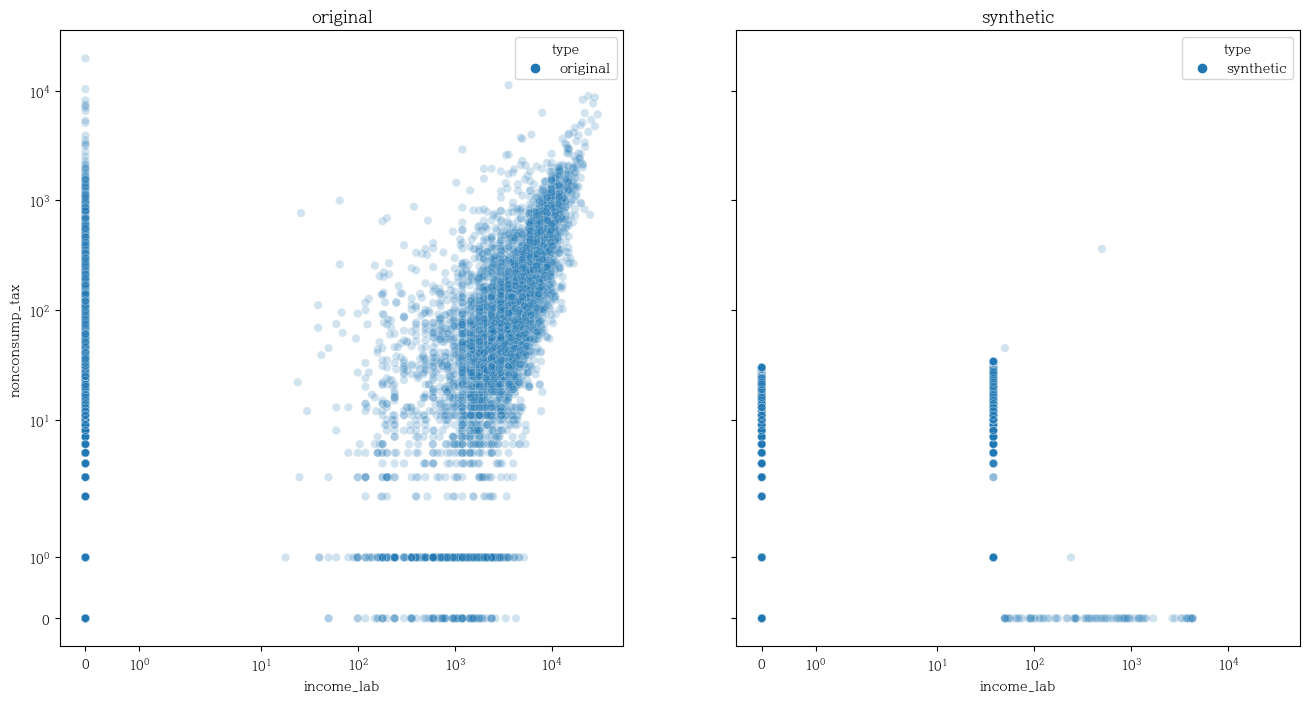

In [71]:
a = final_data.copy()
b = more_final_synthetic_data.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario2_1.png')